In [1]:
from calibration_plot import calibration_plot
from data_processing import read_data, split_data, convert_binary

import warnings

In [2]:
warnings.filterwarnings('ignore')

## Dataset
Function **read_data** is used to read the data from the file located at the path provided. Here, I have used the ***vehicles.csv*** dataset.

In [3]:
X, y,class_map, _, _ = read_data('../../datasets/vehicles.csv')

,Mapping
0,bus
1,opel
2,saab
3,van


## Splitting the data
The given dataset is split into training and test data, and the slpit is the default setting of the function, that is ***25%*** of the data is the ***training data*** and ***75%*** of the data is the ***test data***.

In [4]:
X_train, X_test, y_train, y_test = split_data(X, y)

## Calibration Plot
The given dataset is used to fit the following models:
- **Logistic Regression**
- **Support Vector Machine**
- **K Nearest Neighbours**

After fitting the given models using our dataset, we use the function ***calibration_plot*** to get the fraction of positives and then check how close the probabilities are the to the true probability.
From the plot below, we can infer the following information:
- **SVM** performs the worst, showing extremely low confidence predictions exactly like we saw in the comparison of prediction probabilities of test samples. The calibration plot tells us that the model often predicts a larger probability than the actual probability of the points. This model is **very poorly calibrated**.
- **Logistic Regression** model performs well, it crosses the perfect calibration line multiple times, thereby indicating the model both over-forecasts and under-forecasts the probabilities, i.e., it sometimes predicts probabilities more than and sometimes less than the true probabilities. Hence it is **not very well calibrated**.
- The **KNN** classifier works fairly well and appears the **most calibrated** (comparatively) among all the models.

Model: logistic, Accuracy: 0.9292452830188679
Model: svm, Accuracy: 0.4528301886792453
Model: knn, Accuracy: 0.8490566037735849


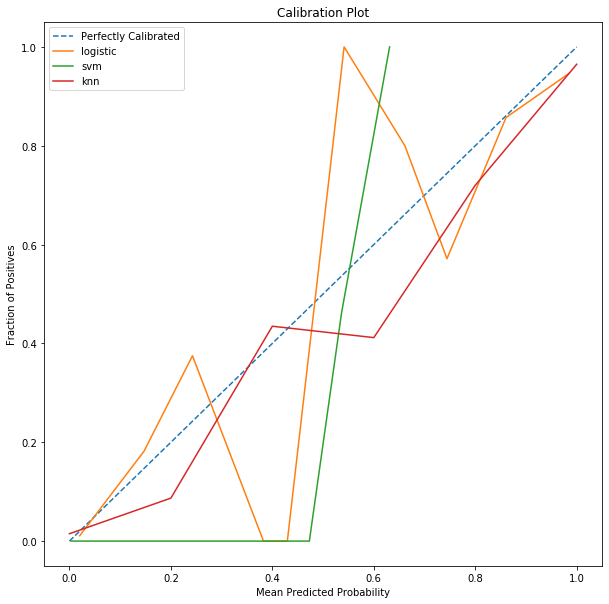

In [5]:
calibration_plot(models=['logistic', 'svm', 'knn'], X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, group=[(0, 3), (1, 2)], labels=[0, 1])